## Support Vector Machine Classification

**We have to predict whether the user is interested in purchasing a car or not.** 

In [1]:
# Importing libraries
import pandas as pd
import numpy as np

In [2]:
# Reading dataset
data = pd.read_csv('Social_Network_Ads.csv')

In [3]:
data.shape

(400, 5)

In [4]:
data.head(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   User ID          400 non-null    int64  
 1   Gender           400 non-null    object 
 2   Age              400 non-null    float64
 3   EstimatedSalary  400 non-null    float64
 4   Purchased        400 non-null    int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 15.8+ KB


In [6]:
# Define dependant and independant variable
X = data.iloc[:, [2,3]].values
y = data.iloc[:, 4].values

In [7]:
# splitting the dataset into training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [8]:
len(X_train)

300

In [9]:
len(X_test)

100

In [10]:
# perform Feature Scaling if required
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [11]:
# Create SVM classification model
from sklearn.svm import SVC
classifier = SVC(kernel='linear',random_state=0)
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [12]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [13]:
result=pd.DataFrame({
    'Actual':y_test,
    'Predicted':y_pred
})

In [14]:
result.head()

,Actual,Predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


Confusion Matrix : 
 [[66  2]
 [ 8 24]]


<AxesSubplot:>

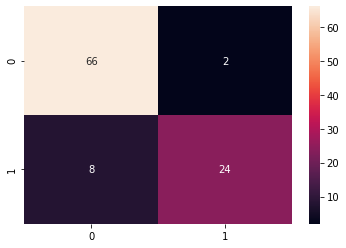

In [15]:
# Analyse the predicted output using confusion matrics
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test,y_pred)
print("Confusion Matrix : \n", cm)
sns.heatmap(cm, annot=True)

In [17]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93        68
           1       0.92      0.75      0.83        32

    accuracy                           0.90       100
   macro avg       0.91      0.86      0.88       100
weighted avg       0.90      0.90      0.90       100



In [18]:
# Accuracy Score
from sklearn.metrics import accuracy_score
ac = accuracy_score(y_test,y_pred)*100
print("Accuracy Score = ",ac)

Accuracy Score =  90.0


In [19]:
# Predict output for any new input
Age = 40
EstimatedSalary = 50000
input = [[Age,EstimatedSalary]]
if classifier.predict(input)[0]==1:
    print("Interested to purchase a car.")
else:
    print("Not interested to purchase a car.")

Interested to purchase a car.


In [20]:
# Predict output for any new input
Age = 25
EstimatedSalary = 30000
input = [[Age,EstimatedSalary]]
if classifier.predict(input)[0]==1:
    print("Interested to purchase a car.")
else:
    print("Not interested to purchase a car.")

Interested to purchase a car.
